In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
## read csv file
NewData = pd.read_csv("assessment_data.csv", index_col='row_id')
NewData.head()

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
row_id,,,,,,,,,,,,,,,,,
0,1,1,0.0,1.0,0.0,0,32,140,C,B,40,0,0,0,0,0.0,14382.25
1,1,1,0.0,1.0,1.0,0,152,40,C,A,29,1,0,0,0,0.0,9715.59
2,1,1,0.0,1.0,0.0,0,17,30,A,B,29,0,1,1,0,0.0,1697.67
3,1,1,0.0,1.0,0.0,0,37,70,C,A,41,0,2,2,0,0.0,10897.33
4,1,1,0.0,1.0,0.0,0,17,30,A,B,29,2,1,1,0,0.0,1026.74


In [4]:
NewData.shape

(303793, 17)

<AxesSubplot:>

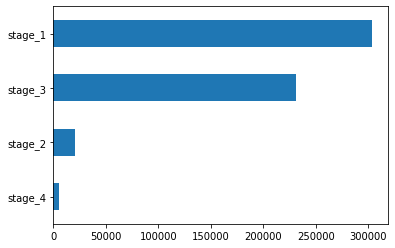

In [5]:
stage_df = NewData[['stage_1','stage_2','stage_3','stage_4']]
stage_df.replace(0,np.nan).count().sort_values().plot(kind='barh')

Text(0.5, 1.0, 'search_feature_1')

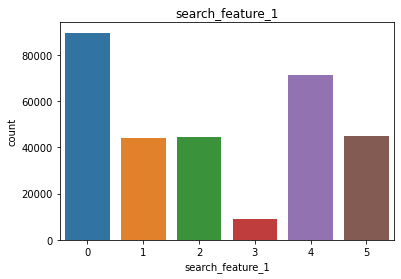

In [6]:
sns.countplot (x= 'search_feature_1', data= NewData).set_title ('search_feature_1')

Text(0.5, 1.0, 'search_feature_4')

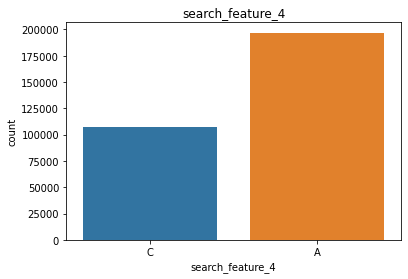

In [351]:
sns.countplot (x= 'search_feature_4', data= NewData).set_title ('search_feature_4')

Text(0.5, 1.0, 'search_feature_5')

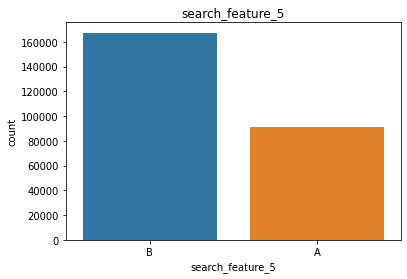

In [352]:
sns.countplot (x= 'search_feature_5', data= NewData).set_title ('search_feature_5')

Text(0.5, 1.0, 'stage_4')

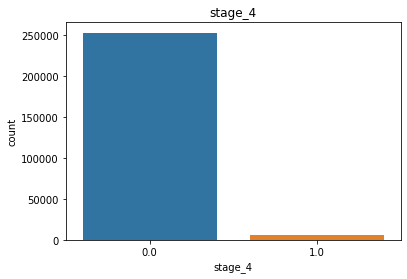

In [353]:
sns.countplot (x= 'stage_4', data= NewData).set_title ('stage_4')

Text(0.5, 1.0, 'stage_2')

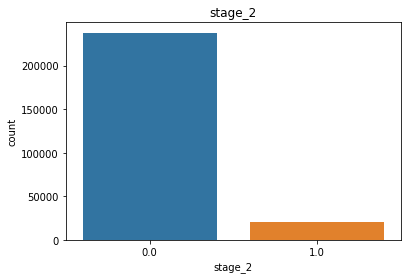

In [354]:
sns.countplot (x= 'stage_2', data= NewData).set_title ('stage_2')

Text(0.5, 1.0, 'stage_1')

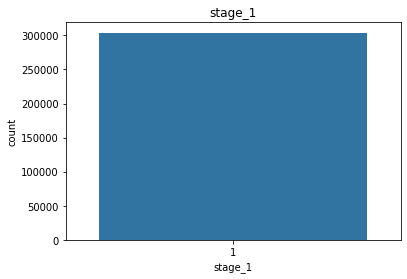

In [355]:
sns.countplot (x= 'stage_1', data= NewData).set_title ('stage_1')

Text(0.5, 1.0, 'stage_3')

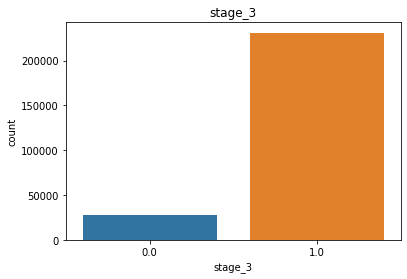

In [356]:
sns.countplot (x= 'stage_3', data= NewData).set_title ('stage_3')

Text(0.5, 1.0, 'product_feature_2')

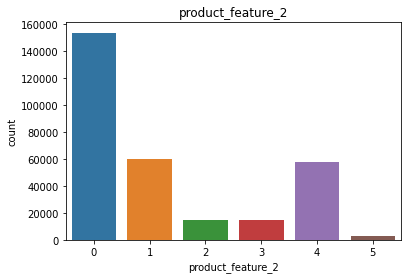

In [357]:
sns.countplot (x= 'product_feature_2', data= NewData).set_title ('product_feature_2')

Text(0.5, 1.0, 'product_feature_5')

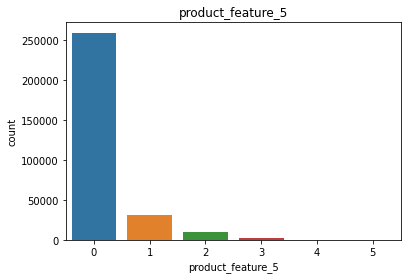

In [358]:
sns.countplot (x= 'product_feature_5', data= NewData).set_title ('product_feature_5')

In [364]:
select_feat_1 ='search_feature_1'

stage1 = round(NewData_stage1[select_feat_1].value_counts() /NewData_stage1.shape[0],2)
stage4 = round(NewData_stage4[select_feat_1].value_counts() /NewData_stage4.shape[0],2)
stage2 = round(NewData_stage2[select_feat_1].value_counts() /NewData_stage2.shape[0],2)
stage3 = round(NewData_stage3[select_feat_1].value_counts() /NewData_stage3.shape[0],2)

In [365]:
def feat_occurance(data, feature_name):
    """
    """
    data_stage1 = data[NewData.stage_1 == 1.0]
    data_stage2 = data[NewData.stage_2 == 1.0]
    data_stage3 = data[NewData.stage_3 == 1.0]
    data_stage4 = data[NewData.stage_4 == 1.0]

    stage1 = round(data_stage1[feature_name].value_counts() /data_stage1.shape[0],2)
    stage2 = round(data_stage2[feature_name].value_counts() /data_stage2.shape[0],2)
    stage3 = round(data_stage3[feature_name].value_counts() /data_stage3.shape[0],2)
    stage4 = round(data_stage4[feature_name].value_counts() /data_stage4.shape[0],2)
    
    stage1.name = 'stage1'
    stage2.name = 'stage2'
    stage3.name = 'stage3'
    stage4.name = 'stage4'

    result = pd.concat([stage1,stage2,stage3,stage4], axis=1)

    return result

In [366]:
NewData.columns

Index(['search_date', 'stage_1', 'stage_2', 'stage_3', 'stage_4',
       'search_feature_1', 'search_feature_2', 'search_feature_3',
       'search_feature_4', 'search_feature_5', 'product_feature_1',
       'product_feature_2', 'product_feature_3', 'product_feature_4',
       'product_feature_5', 'product_feature_6', 'product_feature_7'],
      dtype='object')

In [367]:
df_search_feat1 = feat_occurance(data=NewData, feature_name='search_feature_1')
df_search_feat2 = feat_occurance(data=NewData, feature_name='search_feature_2')
df_search_feat3 = feat_occurance(data=NewData, feature_name='search_feature_3')
df_search_feat4 = feat_occurance(data=NewData, feature_name='search_feature_4')
df_search_feat5 = feat_occurance(data=NewData, feature_name='search_feature_5')

In [368]:
df_product_feature_1 = feat_occurance(data=NewData, feature_name='product_feature_1')
df_product_feature_2 = feat_occurance(data=NewData, feature_name='product_feature_2')
df_product_feature_3 = feat_occurance(data=NewData, feature_name='product_feature_3')
df_product_feature_4 = feat_occurance(data=NewData, feature_name='product_feature_4')
df_product_feature_5 = feat_occurance(data=NewData, feature_name='product_feature_5')
df_product_feature_6 = feat_occurance(data=NewData, feature_name='product_feature_6')
df_product_feature_7 = feat_occurance(data=NewData, feature_name='product_feature_7')

In [369]:
df_search_feat1

,stage1,stage2,stage3,stage4
0,0.29,0.38,0.31,0.32
1,0.15,0.13,0.16,0.18
2,0.15,0.18,0.16,0.18
3,0.03,0.03,0.03,0.03
4,0.23,0.18,0.26,0.23
5,0.15,0.09,0.09,0.06


<AxesSubplot:>

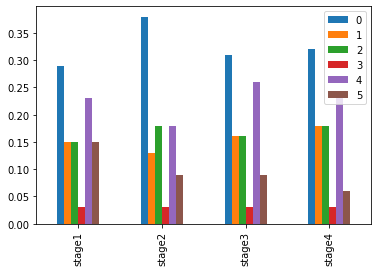

In [380]:
df_search_feat1.T.plot(kind='bar')

In [370]:
# df = pd.df_search_feat1(data,columns=['stage','search_feature_1'])
# df.plot(x ='stage', y='search_feature_1', kind = 'bar')
# plt.show()

In [371]:
df_search_feat2

,stage1,stage2,stage3,stage4
-18,0.0,NaN,NaN,NaN
-12,0.0,NaN,NaN,NaN
-11,0.0,NaN,NaN,NaN
-10,0.0,NaN,NaN,NaN
-7,0.0,NaN,NaN,NaN
...,...,...,...,...
516,0.0,NaN,0.0,NaN
517,0.0,NaN,0.0,NaN
519,0.0,NaN,0.0,NaN
520,0.0,NaN,0.0,NaN


In [372]:
df_search_feat3

,stage1,stage2,stage3,stage4
0,0.01,0.01,0.01,0.00
10,0.02,0.02,0.02,0.02
20,0.05,0.04,0.05,0.09
30,0.08,0.06,0.08,0.11
40,0.09,0.07,0.09,0.11
50,0.10,0.09,0.10,0.10
60,0.12,0.12,0.12,0.11
70,0.18,0.23,0.18,0.16
80,0.10,0.10,0.09,0.08
90,0.06,0.06,0.05,0.05


In [373]:
df_search_feat4

,stage1,stage2,stage3,stage4
A,0.65,0.71,0.65,0.6
C,0.35,0.29,0.35,0.4


<AxesSubplot:>

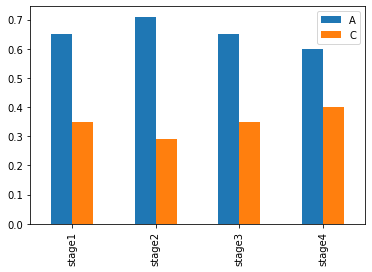

In [378]:
df_search_feat4.T.plot(kind='bar')

In [375]:
df_search_feat5 

,stage1,stage2,stage3,stage4
B,0.55,0.62,0.58,0.52
A,0.30,0.30,0.33,0.42


<AxesSubplot:>

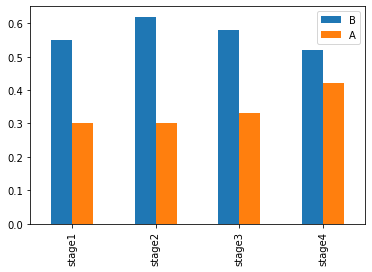

In [379]:
df_search_feat5 .T.plot(kind='bar')

In [215]:
df_product_feature_1 

,stage1,stage2,stage3,stage4
0,0.00,0.00,0.00,0.01
1,0.01,0.00,0.01,0.02
2,0.00,0.00,0.00,0.01
3,0.00,0.00,0.00,0.00
4,0.07,0.05,0.08,0.11
...,...,...,...,...
63,0.00,0.00,0.00,0.00
64,0.01,0.02,0.01,0.01
65,0.05,0.05,0.06,0.04
66,0.00,0.00,0.00,0.00


In [216]:
df_product_feature_2

,stage1,stage2,stage3,stage4
0,0.51,0.51,0.51,0.43
1,0.20,0.20,0.20,0.25
2,0.05,0.07,0.05,0.05
3,0.05,0.06,0.05,0.06
4,0.19,0.16,0.19,0.20
5,0.01,0.01,0.01,0.01


<AxesSubplot:>

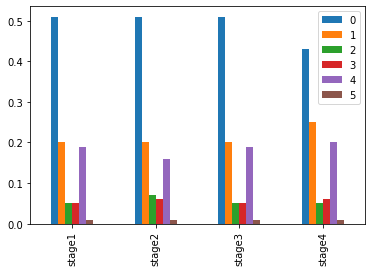

In [381]:
df_product_feature_2.T.plot(kind='bar')

In [217]:
df_product_feature_3 

,stage1,stage2,stage3,stage4
0,0.09,0.09,0.09,0.10
1,0.01,0.02,0.01,0.02
2,0.02,0.02,0.02,0.03
3,0.10,0.12,0.11,0.13
4,0.12,0.13,0.13,0.12
5,0.05,0.06,0.06,0.05
6,0.04,0.05,0.04,0.04
7,0.01,0.01,0.01,0.01
8,0.00,0.01,0.00,0.01
9,0.02,0.02,0.02,0.02


In [218]:
df_product_feature_4 

,stage1,stage2,stage3,stage4
0,0.09,0.08,0.10,0.10
1,0.02,0.02,0.02,0.02
2,0.02,0.02,0.02,0.02
3,0.10,0.09,0.11,0.12
4,0.12,0.12,0.13,0.12
5,0.05,0.06,0.06,0.05
6,0.04,0.05,0.04,0.03
7,0.01,0.01,0.01,0.01
8,0.00,0.01,0.00,0.01
9,0.01,0.01,0.01,0.02


In [219]:
df_product_feature_5

,stage1,stage2,stage3,stage4
0,0.85,0.61,0.89,0.88
1,0.10,0.27,0.07,0.08
2,0.03,0.11,0.03,0.03
3,0.01,0.01,0.00,0.01
4,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,NaN


<AxesSubplot:>

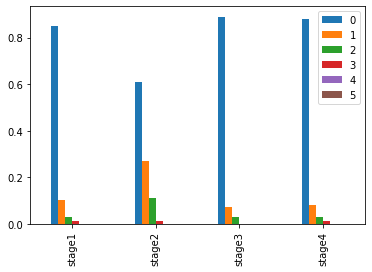

In [382]:
df_product_feature_5.T.plot(kind='bar')

In [220]:
df_product_feature_6 

,stage1,stage2,stage3,stage4
0.00,0.84,0.61,0.87,0.85
88.38,0.00,0.00,NaN,NaN
88.40,0.00,NaN,NaN,NaN
92.15,0.00,NaN,NaN,NaN
92.44,0.00,NaN,NaN,NaN
...,...,...,...,...
40731.67,0.00,NaN,0.00,NaN
41874.13,0.00,NaN,0.00,NaN
42022.30,0.00,0.00,NaN,NaN
42835.52,0.00,NaN,0.00,NaN


In [221]:
df_product_feature_7

,stage1,stage2,stage3,stage4
5.66,0.0,NaN,0.0,NaN
5.69,0.0,NaN,0.0,0.0
5.88,0.0,NaN,0.0,NaN
5.99,0.0,NaN,0.0,NaN
6.39,0.0,NaN,0.0,NaN
...,...,...,...,...
198736.51,0.0,NaN,0.0,NaN
199006.25,0.0,NaN,0.0,NaN
206077.44,0.0,NaN,0.0,NaN
280955.00,0.0,NaN,NaN,NaN


<AxesSubplot:>

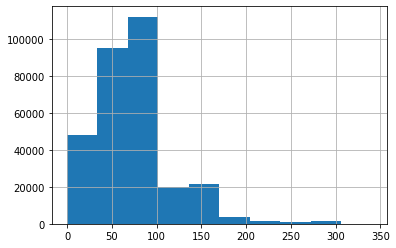

In [264]:
# select_feat ='search_feature_3'
 NewData_stage1[select_feat].hist()

In [223]:
# ##shape of data
# NewData.shape

In [224]:
# ## features in data 
# NewData.columns

In [225]:
NewData.describe()

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
count,303793.000000,303793.0,258944.000000,258944.000000,258944.000000,303793.000000,303793.000000,303793.000000,303793.000000,303793.000000,303793.000000,303793.000000,303793.000000,293415.000000,283074.000000
mean,23.819835,1.0,0.081520,0.892483,0.021924,2.210018,67.114157,72.224278,28.652632,1.247553,16.167338,16.865882,0.196127,782.598908,14668.200226
std,11.409094,0.0,0.273632,0.309771,0.146435,1.893331,75.881830,41.761682,18.581648,1.595313,14.350078,14.847593,0.526702,2605.334680,16420.414612
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.660000
25%,15.000000,1.0,0.000000,1.000000,0.000000,0.000000,21.000000,50.000000,8.000000,0.000000,4.000000,4.000000,0.000000,0.000000,3024.867500
50%,25.000000,1.0,0.000000,1.000000,0.000000,2.000000,43.000000,70.000000,29.000000,0.000000,10.000000,10.000000,0.000000,0.000000,9078.650000
75%,33.000000,1.0,0.000000,1.000000,0.000000,4.000000,77.000000,90.000000,39.000000,2.000000,34.000000,34.000000,0.000000,0.000000,20864.437500
max,42.000000,1.0,1.000000,1.000000,1.000000,5.000000,522.000000,340.000000,67.000000,5.000000,38.000000,39.000000,5.000000,43485.370000,295144.430000


In [226]:
NewData.isnull().any().any()

True

In [227]:
NewData.isnull().sum().sort_values(ascending=False)[:10]

search_feature_5     45080
stage_2              44849
stage_3              44849
stage_4              44849
product_feature_7    20719
product_feature_6    10378
search_feature_2         0
stage_1                  0
search_feature_1         0
search_feature_4         0
dtype: int64

In [228]:
NewData = NewData.dropna(axis = 0) # We delete rows with empty cells

In [229]:
NewData.isnull().any().any()

False

In [230]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219313 entries, 0 to 303792
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   search_date        219313 non-null  int64  
 1   stage_1            219313 non-null  int64  
 2   stage_2            219313 non-null  float64
 3   stage_3            219313 non-null  float64
 4   stage_4            219313 non-null  float64
 5   search_feature_1   219313 non-null  int64  
 6   search_feature_2   219313 non-null  int64  
 7   search_feature_3   219313 non-null  int64  
 8   search_feature_4   219313 non-null  object 
 9   search_feature_5   219313 non-null  object 
 10  product_feature_1  219313 non-null  int64  
 11  product_feature_2  219313 non-null  int64  
 12  product_feature_3  219313 non-null  int64  
 13  product_feature_4  219313 non-null  int64  
 14  product_feature_5  219313 non-null  int64  
 15  product_feature_6  219313 non-null  float64
 16  pr

In [231]:
## number of unique values in each feature 
for col in NewData.columns.values:
    print("Number of unique values of {} : {}".format(col, NewData[col].nunique()))

Number of unique values of search_date : 43
Number of unique values of stage_1 : 1
Number of unique values of stage_2 : 2
Number of unique values of stage_3 : 2
Number of unique values of stage_4 : 2
Number of unique values of search_feature_1 : 5
Number of unique values of search_feature_2 : 466
Number of unique values of search_feature_3 : 35
Number of unique values of search_feature_4 : 2
Number of unique values of search_feature_5 : 2
Number of unique values of product_feature_1 : 67
Number of unique values of product_feature_2 : 6
Number of unique values of product_feature_3 : 39
Number of unique values of product_feature_4 : 39
Number of unique values of product_feature_5 : 6
Number of unique values of product_feature_6 : 23001
Number of unique values of product_feature_7 : 174086


In [232]:
# sns.catplot(x='product_feature_5',data=NewData,kind='count')

In [233]:
# NewData.groupby(['search_date', 'stage_1','stage_2','stage_3','stage_4'])['search_date'].count()

<AxesSubplot:>

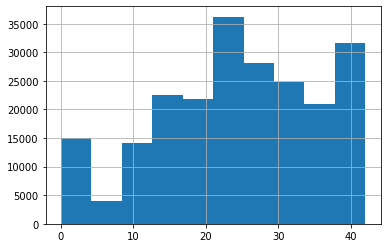

In [284]:
 NewData.search_date.hist()